In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="darkgrid")
DATA=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA_no_modify.csv",sep=',')
DATA['Time'] = pd.to_datetime(DATA['Time'])
column_names = DATA.columns.values
#a.columns = column_names
#tm=(DATA['Time']< datetime(2010,12,31,0,0,0))& (DATA['Time']>=datetime(2003,12,31,0,0,0) ) #modify interval of time
#DATA_2006_2011= DATA[tm]
#plot=sns.scatterplot(x="Time", y="Latitude", size='Magnitude',palette='YlGn',data=DATA_2006_2011, sizes=(2, 100)) # palette= sets the colour of hue
#plot


### CALCULATING INTEREVENT TIMES
##### scroll down to see the successive scripts

In [2]:
#plot.set(xlim=[datetime.date(2020, 3, 5), datetime.date(2020, 3, 15)]) #plot.set(yscale="log")
#plot.set(xticklabels=['2020/03-/05','','','','','2020/03/10','','','','','2020/03/15'])
#sns.palplot(sns.color_palette("BuGn_r"))
a_numpy=DATA.to_numpy()
slice_numpy=a_numpy[:,1].astype(np.datetime64)
list_array=[]
#whereis=np.where(slice_numpy=='Time') #search where is the cell called 'Time'
'''
n=0
for i in slice_numpy:
    n+=1
    if n>1:
        list_array.append(i)
list_array''' #to transform numpy array to list
m=0
lis_diff=[]
lis=[]
for i in slice_numpy:
    m+=1
    if m>0 and m < len(slice_numpy):  #the second condition is written to avoid the error due to exceedance of array lenght  
        diff=((slice_numpy[m]-slice_numpy[m-1])/1000000).astype(np.int32) #convert in int
        lis_diff.append(diff)
        #print(diff)
        #from seconds to day,hours,minutes,seconds
        #it's not necessary to do what I did, but I wanted to do in a more complete way in order to choose
        #if visualize '0' too
        '''if np.floor_divide(diff,60*60*24)>0:
            days=np.floor_divide(diff,60*60*24)
            hou=np.mod(diff,60*60*24)
            hours=np.floor_divide(hou,60*60)
            minu=np.mod(hou,60*60)
            minutes=np.floor_divide(minu,60)
            seconds=np.mod(minu,60)
            #real_time=f'{days}:{hours}:{minutes}.{seconds}'
            #real_time2=datetime.datetime.strptime(real_time, '%d:%H:%M.%S').time()  '''                  
        if np.floor_divide(diff,60*24)>0:       
            hours=np.floor_divide(diff,60*60)
            if hours<10: #to put zero
                hours='0'+str(hours)
            hou=np.mod(diff,60*60*24)
            minu=np.mod(hou,60*60)
            minutes=np.floor_divide(minu,60)
            if minutes<10:
                minutes='0'+str(minutes)
            seconds=np.mod(minu,60)
            if seconds<10: 
                seconds='0'+str(seconds)
            #real_time=f'{hours}:{minutes}.{seconds}'
            #real_time2=datetime.datetime.strptime(real_time, '%H:%M.%S').time()  
        else: # np.floor_divide(diff,60)>0:
            minu=np.mod(diff,60*60)
            minutes=np.floor_divide(minu,60)
            if minutes<10:
                minutes='0'+str(minutes)
            seconds=np.mod(minu,60)
            if seconds<10:
                seconds='0'+str(seconds)
            #real_time=f'{minutes}.{seconds}'
            #real_time2=datetime.datetime.strptime(real_time, '%M.%S').time()
        #print(days,hours,minutes,seconds)
        real_time=f'{hours}:{minutes}.{seconds}' #look the previous caveat 
        lis.append(real_time) 
lis_series=pd.Series(lis)
#print(lis_series.count())
#print(lis_series)
print(lis_diff)
from datetime import datetime
'''new=[]
for i in lis_series:
    try:
        new_element_series=datetime.datetime.strptime(i, '%d:%H:%M.%S').time()
    except ValueError:
        try:
            new_element_series=datetime.datetime.strptime(i, '%H:%M.%S').time()
        except ValueError:
            try:
                new_element_series=datetime.datetime.strptime(i, '%M.%S').time()
            except ValueError:
                new_element_series=datetime.datetime.strptime(i, '%S').time()
    finally:
        new.append(new_element_series)'''
#lis_series.describe()   
#plot1=sns.distplot(lis_diff,bins=5,kde=False)
#plot1.set(xlim=[min(lis_diff), 65000])
#plot1

[6513, 144683, 25334, 13628, 17138, 6044, 63536, 1633, 37143, 9857, 16251, 9658, 25147, 12838, 32810, 4129, 23973, 16023, 48959, 5241, 301, 3265, 9599, 13042, 18252, 3954, 35514, 23333, 22343, 14405, 13732, 424, 18059, 71992, 3202, 51669, 21363, 2630, 56932, 30580, 27362, 58145, 91506, 43119, 31055, 28382, 28999, 19730, 75322, 828, 96990, 5637, 19242, 17764, 70538, 19836, 11816, 20435, 42244, 26631, 54010, 12041, 30900, 656, 220974, 100291, 105669, 334558, 5400, 31969, 525, 3376, 8396, 3165, 42658, 5333, 32546, 56840, 31168, 17528, 1824, 30, 1741, 23, 178, 7387, 41050, 20353, 23856, 7131, 1550, 6920, 8681, 9401, 5214, 6662, 48788, 15174, 33917, 8486, 1384, 45591, 2213, 3256, 1667, 106, 18723, 30411, 225, 4513, 4688, 20391, 311, 18954, 20801, 101, 36861, 632, 30310, 549, 28030, 16523, 84719, 6312, 21366, 48448, 13476, 14729, 7322, 10660, 4897, 374, 8246, 15262, 16089, 27609, 27815, 16598, 11157, 119, 11947, 12878, 2935, 2627, 3281, 33100, 1131, 7841, 13465, 9465, 23691, 7218, 24386, 139

"new=[]\nfor i in lis_series:\n    try:\n        new_element_series=datetime.datetime.strptime(i, '%d:%H:%M.%S').time()\n    except ValueError:\n        try:\n            new_element_series=datetime.datetime.strptime(i, '%H:%M.%S').time()\n        except ValueError:\n            try:\n                new_element_series=datetime.datetime.strptime(i, '%M.%S').time()\n            except ValueError:\n                new_element_series=datetime.datetime.strptime(i, '%S').time()\n    finally:\n        new.append(new_element_series)"

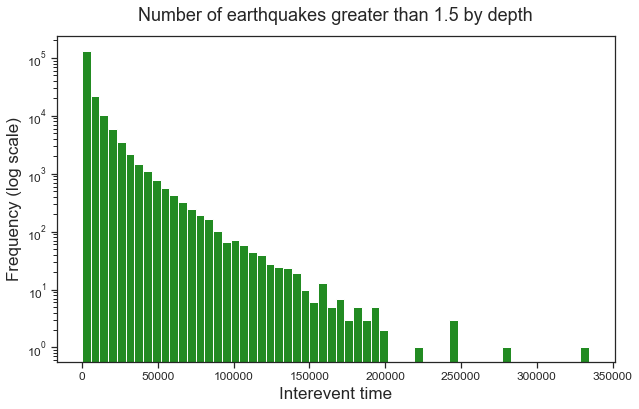

In [5]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(lis_diff,color='forestgreen',bins=58)
sns.set(style="ticks", palette="pastel")
plt.yscale('log')
plt.xlabel('Interevent time',fontsize=17,labelpad=5)
plt.ylabel('Frequency (log scale)',fontsize=17,labelpad=5)
plt.title('Number of earthquakes greater than 1.5 by depth',fontsize=18,pad=15.0)  
plt.tick_params(labelsize=12)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-frequency_logscale.png",dpi=600)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


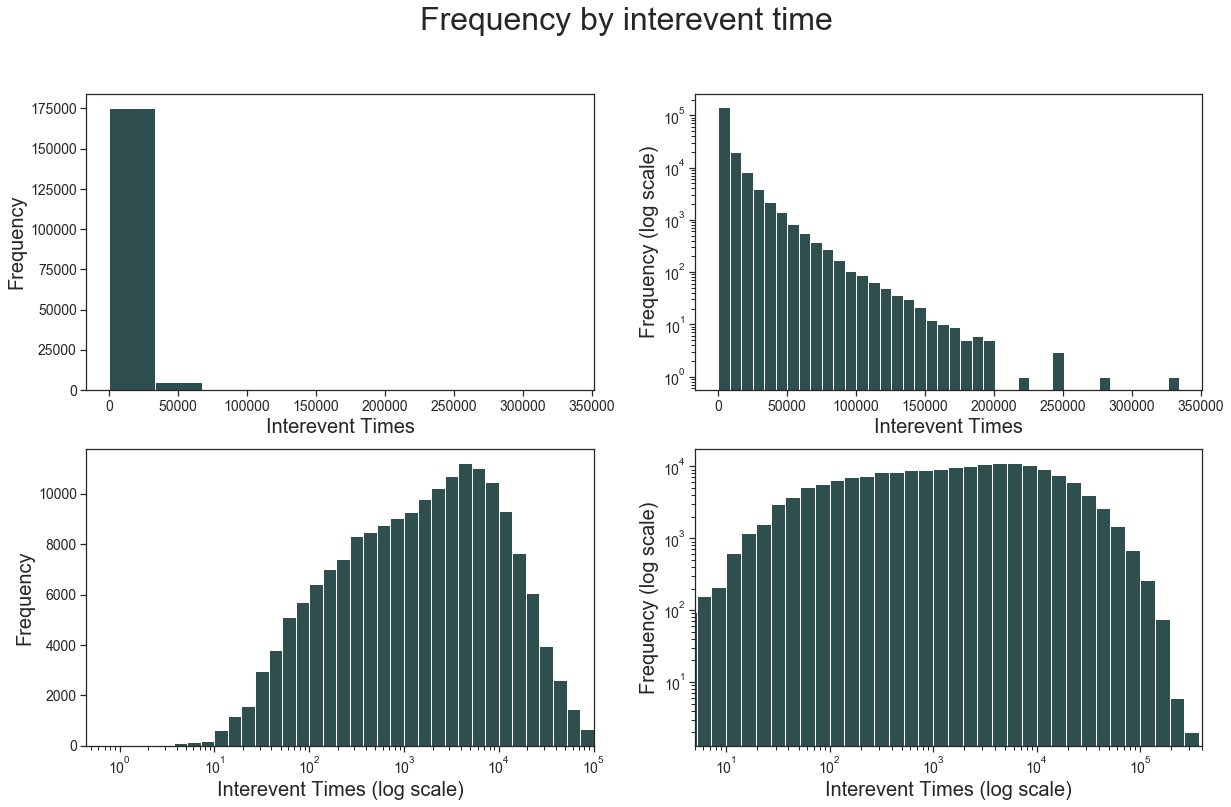

In [6]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('Frequency by interevent time',fontsize=32)
# Draw a nested boxplot 
bins = np.logspace(0,7,num=50)    
axes[0][0].hist(lis_diff,color='darkslategray')  
axes[1][0].hist(lis_diff,bins=bins,color='darkslategray')
axes[0][1].hist(lis_diff,bins=40,color='darkslategray')
axes[1][1].hist(lis_diff,bins=bins,color='darkslategray')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Interevent Times",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency",fontsize=20) #set font and title of y label
            ax.tick_params(labelsize=14) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Interevent Times (log scale)",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency",fontsize=20) #set font and title of y label
            ax.set_xscale('log')
            ax.tick_params(labelsize=14)
            ax.set_xlim([0, 100000])
        elif i == 0 and j==1:
            title = ax.set_xlabel("Interevent Times",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=20) #set font and title of y label
            ax.set_yscale('log')
            ax.tick_params(labelsize=14)

        elif i==1 and j == 1:
            title = ax.set_xlabel("Interevent Times (log scale)",fontsize=20) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=20) #set font and title of y label
            ax.tick_params(labelsize=14)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlim([5, 400000])
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-frequency_logscale_united.png",dpi=600)

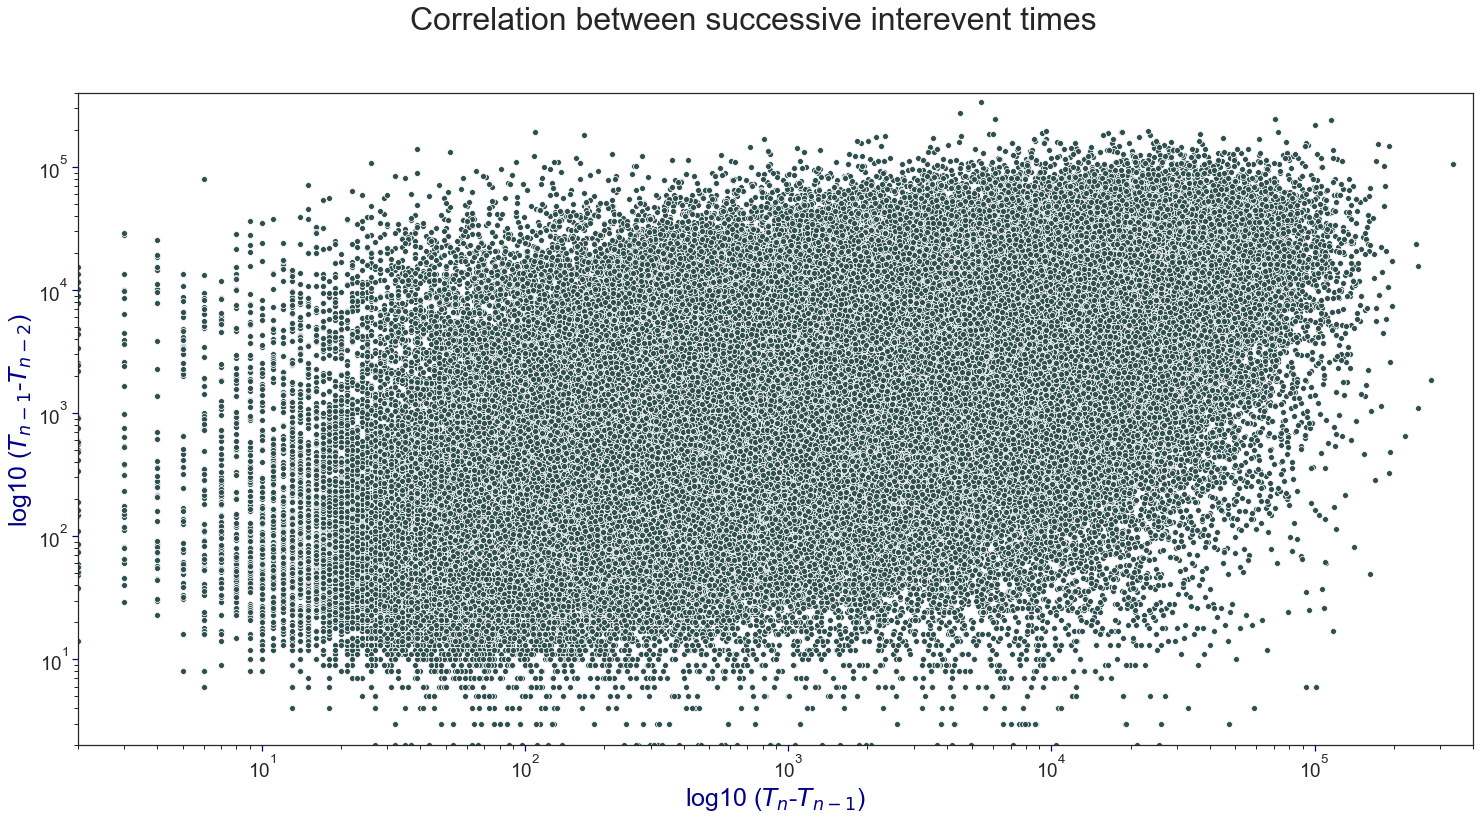

In [7]:

a=lis_diff
m=0
lis_diff2=[]
for i in a:
    m+=1
    if m>=0 and m < len(a):
        diff2=[a[m],a[m-1]]
        lis_diff2.append(diff2)
final1=[]
final2=[]
for i in lis_diff2:
    j=i[0]
    k=i[1]    
    final1.append(j)
    final2.append(k)
fig,axes=plt.subplots(1,1,figsize=(25,12))
sns.set(style="ticks")#, palette="pastel")
fig.suptitle('Correlation between successive interevent times',fontsize=32)
sns.scatterplot(final1,final2,color='darkslategray')     
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim([2, 400000])
axes.set_ylim([2, 400000])
axes.set_xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=25,color='darkblue') #set font and title of x label
axes.set_ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=25,color='darkblue') #set font and title of y label
axes.tick_params(labelsize=19,color='darkblue')
#explain why there is a correlation between the two variables. It depends even on the area.
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents.png",dpi=600)


#### Ignore the first little graph below. It's only a regression line applied to some sample points

y=1.24+1.17x


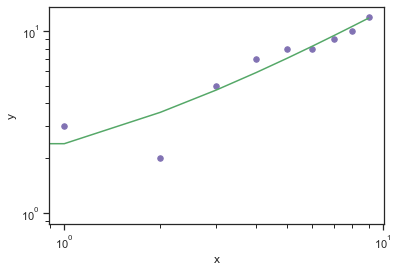

y=-0.780111+1.0001239x
R2: 0.10104090355274477


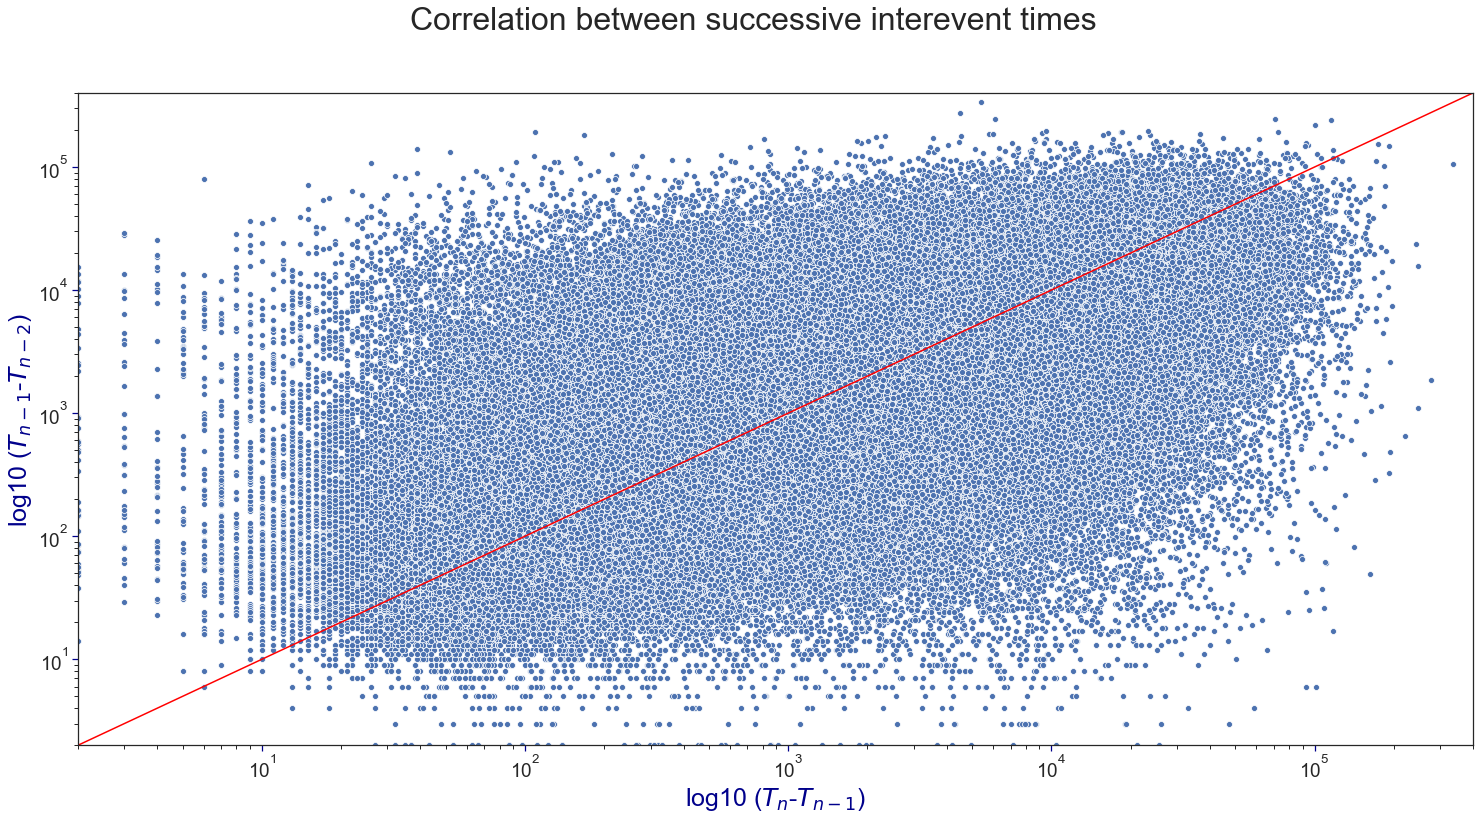

In [21]:
#example linear regression
%run linear_regression.ipynb

if __name__ == "__main__": 
    # observations 
    x=np.array(final1)
    y=np.array(final2)
    # estimating coefficients
    b = estimate_coef(x,y) 
    print(f'y={b[0].round(7)}+{b[1].round(7)}x')
    correlation_matrix = np.corrcoef(final1,final2)
    correlation_xy = correlation_matrix[0,1]
    r_squared1 = correlation_xy**2
    print(f'R2: {r_squared1}')
    # plotting regression line 
    x_random=np.array([0,400000])
    y_pred = b[0] + b[1]*x_random
    fig,axes=plt.subplots(1,1,figsize=(25,12))
    sns.set(style="ticks")#, palette="pastel")
    fig.suptitle('Correlation between successive interevent times',fontsize=32)
    sns.lineplot(x_random,y_pred,color='red')     
    sns.scatterplot(x,y)
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlim([2, 400000])
    axes.set_ylim([2, 400000])
    axes.set_xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=25,color='darkblue') #set font and title of x label
    axes.set_ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=25,color='darkblue') #set font and title of y label
    axes.tick_params(labelsize=19,color='darkblue')
    #fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_regr.png",dpi=600)

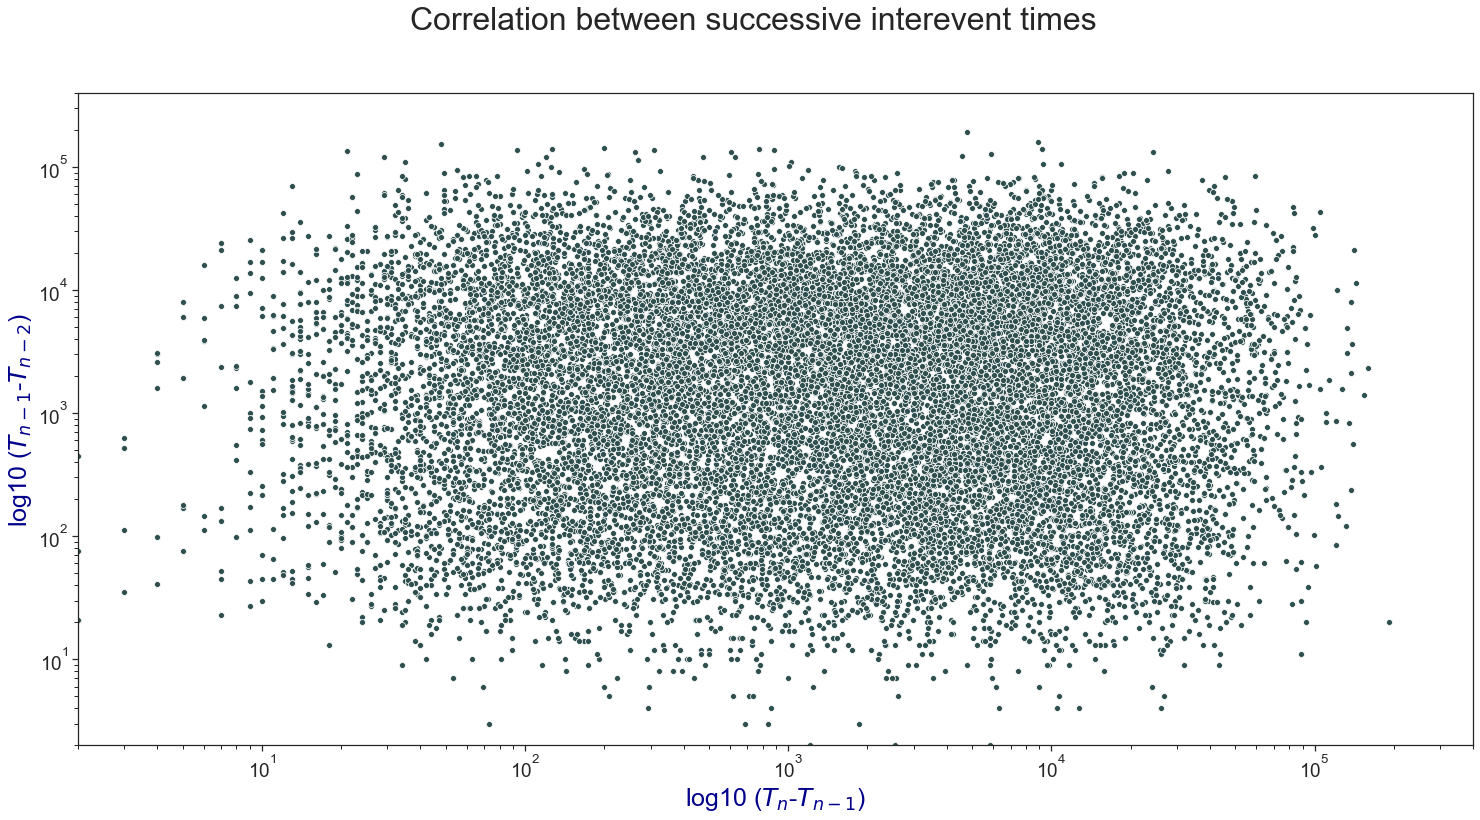

In [44]:
lis_diff_cut=lis_diff[1000:20000]
m=0
lis_diff2_cut=[]
for i in lis_diff_cut:
    m+=1
    if m>=0 and m < len(lis_diff_cut):
        diff2=[lis_diff_cut[m],lis_diff_cut[m-1]]
        lis_diff2_cut.append(diff2)
final1_cut=[]
final2_cut=[]
for i in lis_diff2_cut:
    j=i[0]
    k=i[1]    
    final1_cut.append(j)
    final2_cut.append(k)
fig,axes=plt.subplots(1,1,figsize=(25,12))
sns.set(style="ticks")#, palette="pastel")
fig.suptitle('Correlation between successive interevent times',fontsize=32)
sns.scatterplot(final1_cut,final2_cut,color='darkslategray')     
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim([2, 400000])
axes.set_ylim([2, 400000])
axes.set_xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=25,color='darkblue') #set font and title of x label
axes.set_ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=25,color='darkblue') #set font and title of y label
axes.tick_params(labelsize=19)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_onlysome.png",dpi=600)

#### Ignore the first little graph below. It's only a regression line applied to some sample points

y=1.24+1.17x


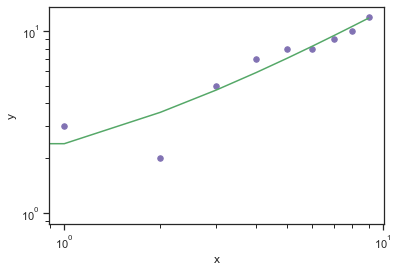

R2: 9.260672918339278e-07


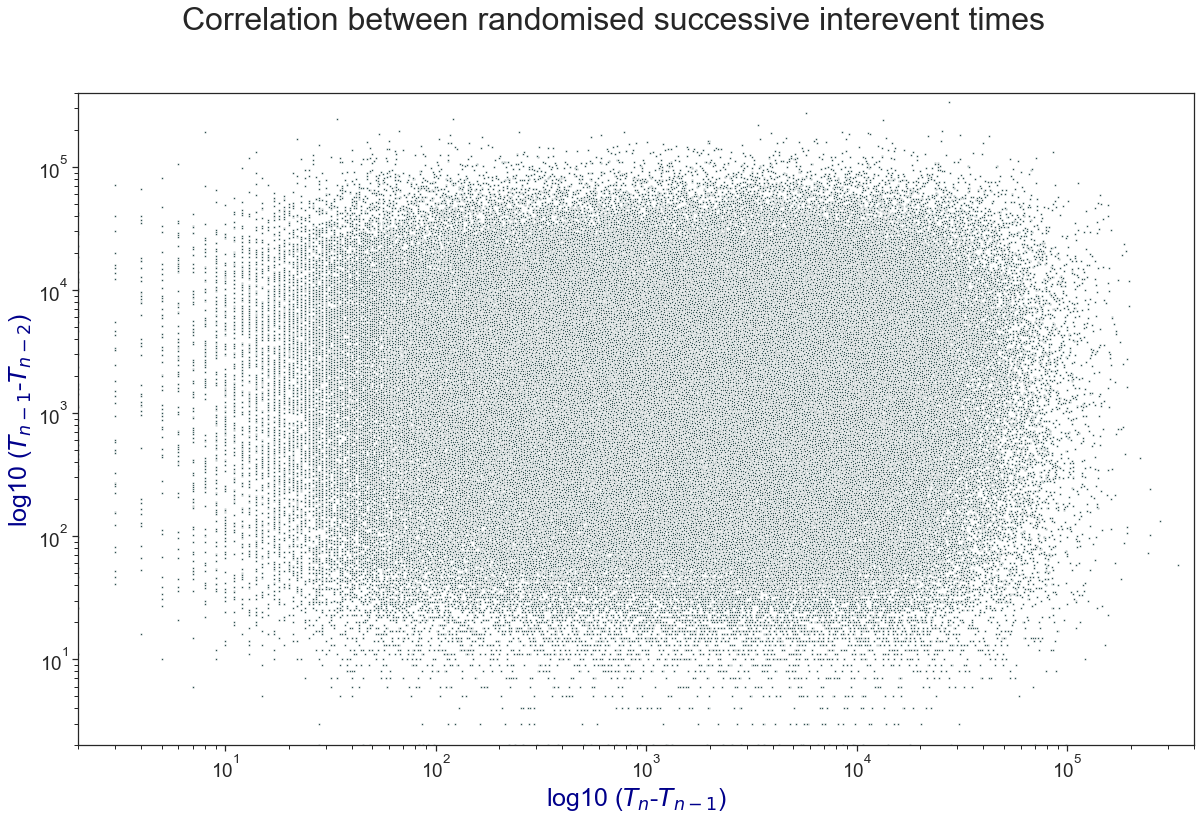

In [12]:
import random
%run linear_regression.ipynb
m=0
random.shuffle(lis_diff)
lis_diff2_randomised=[]
for i in lis_diff:
    m+=1
    if m>=0 and m < len(lis_diff):
        diff2=[lis_diff[m],lis_diff[m-1]]
        lis_diff2_randomised.append(diff2)
final1_rand=[]
final2_rand=[]
for i in lis_diff2_randomised:
    j=i[0]
    k=i[1]    
    final1_rand.append(j)
    final2_rand.append(k)
fig,axes=plt.subplots(1,1,figsize=(20,12))
sns.set(style="ticks")#, palette="pastel")
fig.suptitle('Correlation between randomised successive interevent times ',fontsize=32)
sns.scatterplot(final1_rand,final2_rand,color='darkslategray',s=6)     
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlim([2, 400000])
axes.set_ylim([2, 400000])
axes.set_xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=25,color='darkblue') #set font and title of x label
axes.set_ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=25,color='darkblue') #set font and title of y label
axes.tick_params(labelsize=19)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_randomised.png",dpi=600)
correlation_matrix = np.corrcoef(final1_rand,final2_rand)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f'R2: {r_squared}')

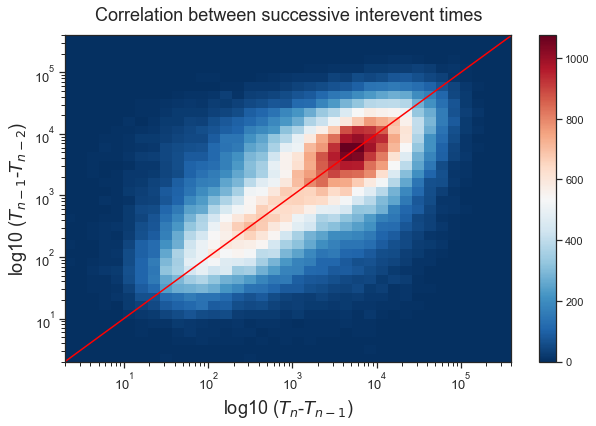

In [22]:
bins = np.logspace(0,7,num=50) 
plt.subplots(figsize=(10,6))
plt.hist2d(final1,final2,bins,cmap=plt.cm.RdBu_r)
#plt.plot(x,y_pred,color='darkslategray')
sns.lineplot(x_random,y_pred,color='red') 
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation between successive interevent times',fontsize=18,pad=15.0) 
plt.xlim([2, 400000])
plt.ylim([2, 400000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=18,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=13)
plt.colorbar()
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_hist2d_regr_line.png",dpi=600)

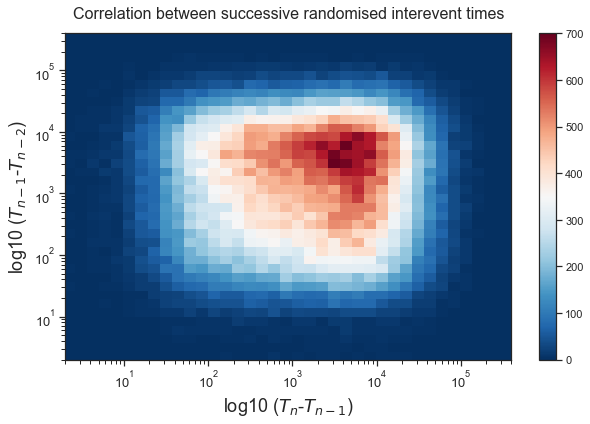

In [93]:
bins = np.logspace(0,7,num=50) 
plt.subplots(figsize=(10,6))
plt.hist2d(final1_rand,final2_rand,bins,cmap=plt.cm.RdBu_r)
plt.xscale('log')
plt.yscale('log')
plt.title('Correlation between successive randomised interevent times',fontsize=16,pad=15.0) 
plt.xlim([2, 400000])
plt.ylim([2, 400000])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10 ($T_{n}$-$T_{n-1}$)",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("log10 ($T_{n-1}$-$T_{n-2}$)",fontsize=18,labelpad=5) #set font and title of y label
plt.tick_params(labelsize=13)
plt.colorbar()
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\interevents-interinterevents_randomised_hist2d.png",dpi=600)